# Multidimensional Search Algorithms

In [179]:
from pylab import *
import numpy as np

An alternative way of finding $\alpha$: $$\alpha = \frac{d^Td}{d^THd}$$ <br> using the golden section method (given)

In [180]:
def linesearch_golden_section(f, x, d, alpha_init=None, xtol=1e-3):
    
    # initial point
    alpha0 = 0
    f0 = f(x+alpha0*d)
    
    # now find a bracket for the minimum
    if alpha_init == None:
        alpha1 = 1
    else:
        alpha1 = alpha_init
        
    # check to see if the point at alpha1 goes down, if not find one that does
    while f(x+alpha1*d) > f0:
        alpha1 /= 2.0
        #print (alpha0, f0, alpha1, fa(alpha1))
    
    f1 = f(x+alpha1*d)
    
    # set up golden section ratio
    r = (np.sqrt(5)-1)/2.0
    # now find the outer bracket alpha2 where the function goes up again
    alpha2 = alpha1/r
    while f(x+alpha2*d) < f1:
        alpha1 = alpha2
        alpha2 = alpha1/r
    f2 = f(x+alpha2*d)
    
    # now we have three points in Golden Section ratio, (alpha0, alpha1, alpha2) such that the function goes down then up,
    # so it must have a minimum in between
    
    # now loop until convergence
    while abs(alpha0-alpha2) > xtol:
        # get 4th point
        alpha3 = alpha0*r+alpha2*(1-r); f3 = f(x+alpha3*d) # 0,3,1,2
        
        # depending on where the function value falls, update the brackets
        if f3 < f1:
            alpha2=alpha1; f2=f1
            alpha1=alpha3; f1=f3
        else:
            alpha0=alpha2; f0=f2
            alpha2=alpha3; f2=f3
    return 0.5*(alpha0+alpha2)

# Multidimensional Search

### **x<sub>k+1</sub>** = **x<sub>k</sub>** + $\alpha$<sub>k</sub>**d<sub>k</sub>** 

## Steepest Descent

where, <br><br>
$$\textbf d_k = -\nabla f(\textbf x_k)$$ <br> and,
$$\alpha_{k} =  \frac{\textbf d_k^T \textbf d_k}{\textbf d_k^TH(\textbf x_k) \textbf d_k}$$

In [181]:
def steepest_descent(f, df, x0, ftol, xtol=1e-3):
    traj = []
    
    # get initial direction
    x = x0[:]
    d = -1.0*df(x)
    alpha_init = 1e-6
    i = 0
    #print i, f(x), np.linalg.norm(d), x[:], d[:]
    traj.append((x[0],x[1]))

    # loop until convergence
    while np.linalg.norm(d) > ftol:
        i += 1
        # do line search in current direction 
        alpha = linesearch_golden_section(f, x, d, alpha_init, xtol)
        # update estimate
        x += alpha*d
        # get new direction        
        d = -1.0*df(x)
        
        #print i, f(x), np.linalg.norm(d), x[:], d[:]
        traj.append((x[0],x[1]))

    return x[:],traj, i


## Newtons Method

where, <br><br>
$$\textbf d_k = -H(\textbf x_k)^{-1}\nabla f(\textbf x_k)$$ <br> and,
$$\alpha_{k} =  1$$

In [182]:
def newton(f, df, ddf, x0, ftol, xtol=1e-3):
    traj = []
    
    # get initial direction
    x = np.array(x0[:])
    d = -1.0*asarray(np.matmul(np.linalg.inv(ddf(x)),df(x)))[0]
    
    i = 0
    #print i, f(x), np.linalg.norm(d), x[:], d[:]
    traj.append((x[0],x[1]))

    # loop until convergence
    while np.linalg.norm(d) > ftol:
        i += 1
        # update estimate
        x += d
        # get new direction        
        d = -1.0*asarray(np.matmul(np.linalg.inv(ddf(x)),df(x)))[0]
        
        #print i, f(x), np.linalg.norm(d), x[:], d[:]
        traj.append((x[0],x[1]))

    return x[:],traj, i

## Newton-Raphson Method

where, <br><br>
$$\textbf d_k = -H(\textbf x_k)^{-1}\nabla f(\textbf x_k)$$ <br> and,
$$\alpha_{k} =  \frac{\nabla f(\textbf x_k)^T \textbf d_k}{\textbf d_k^TH(\textbf x_k) \textbf d_k}$$

In [183]:
def newton_raphson(f, df, ddf, x0, ftol, xtol=1e-3):
    traj = []
    
    # get initial direction
    x = np.array(x0[:])
    d = -1.0*asarray(np.matmul(np.linalg.inv(ddf(x)),df(x)))[0]
    
    i = 0
    #print i, f(x), np.linalg.norm(d), x[:], d[:]
    traj.append((x[0],x[1]))

    alpha_init = 1e-6

    # loop until convergence
    while np.linalg.norm(d) > ftol:
        i += 1
        # do line search in current direction 
        alpha = linesearch_golden_section(f, x, d, alpha_init, xtol)
        #print alpha
        # update estimate
        x += alpha*d
        # get new direction        
        d = -1.0*asarray(np.matmul(np.linalg.inv(ddf(x)),df(x)))[0]
        
        #print i, f(x), np.linalg.norm(d), x[:], d[:]
        traj.append((x[0],x[1]))

    return x[:],traj, i


## Conjugate Gradient Method

where, <br><br>
$$\textbf d_k = -\nabla f(\textbf x_k) + \beta_{k-1} \textbf d_{k-1} ,$$ <br> 
$$\beta_{k-1} = \left[\frac{|\nabla f(\textbf x_{k})|}{|\nabla f(\textbf x_{k-1})|}\right]^2,$$
<br> and,
$$\alpha_{k} =  \frac{\nabla f(\textbf x_k)^T \textbf d_k}{\textbf d_k^TH(\textbf x_k) \textbf d_k}$$

In [184]:
def conjugate_gradients(f, df, x0, ftol, xtol=1e-3, n_restart=None):
    traj = []
    
    # get initial direction
    x = x0[:]
    df_new = df(x)
    d = -1.0*df_new
    alpha_init = 1e-6
    i = 0
    #print i, f(x), np.linalg.norm(d), x[:], d[:]
    traj.append((x[0],x[1]))

    # loop until convergence
    while np.linalg.norm(df_new) > ftol:
        i += 1
        # do line search in current direction 
        alpha = linesearch_golden_section(f, x, d, alpha_init, xtol)
        # update estimate
        x += alpha*d
        # get beta
        df_old = df_new[:]
        df_new = df(x)
        beta = (np.linalg.norm(df_new)/np.linalg.norm(df_old))**2
        # get new direction
        if n_restart == None or i%n_restart != 0:
            d = beta*d
        d += -1.0*df_new
        
        #print i, f(x), np.linalg.norm(d), x[:], d[:]
        traj.append((x[0],x[1]))

    return x[:],traj, i

# Function - Rosenbrock's Function

In [185]:
def Rosen(x,a=10):
    return (1-x[0])**2 + a*(x[1]-x[0]**2)**2
def dRosen(x,a=10):
    return np.array([-2.0*(1.0-x[0]) - 2.0*a*(x[1]-x[0]**2)*2.0*x[0],2.0*a*(x[1]-x[0]**2)])
def ddRosen(x,a=10):
    return np.matrix([[2.0 - 4.0*a*(x[1]-x[0]**2) - 4.0*a*(-2.0*x[0])*x[0], -4.0*a*x[0]],
                      [-4.0*a*x[0]                                        ,   2.0*a ]])

# Comparing Search Methods

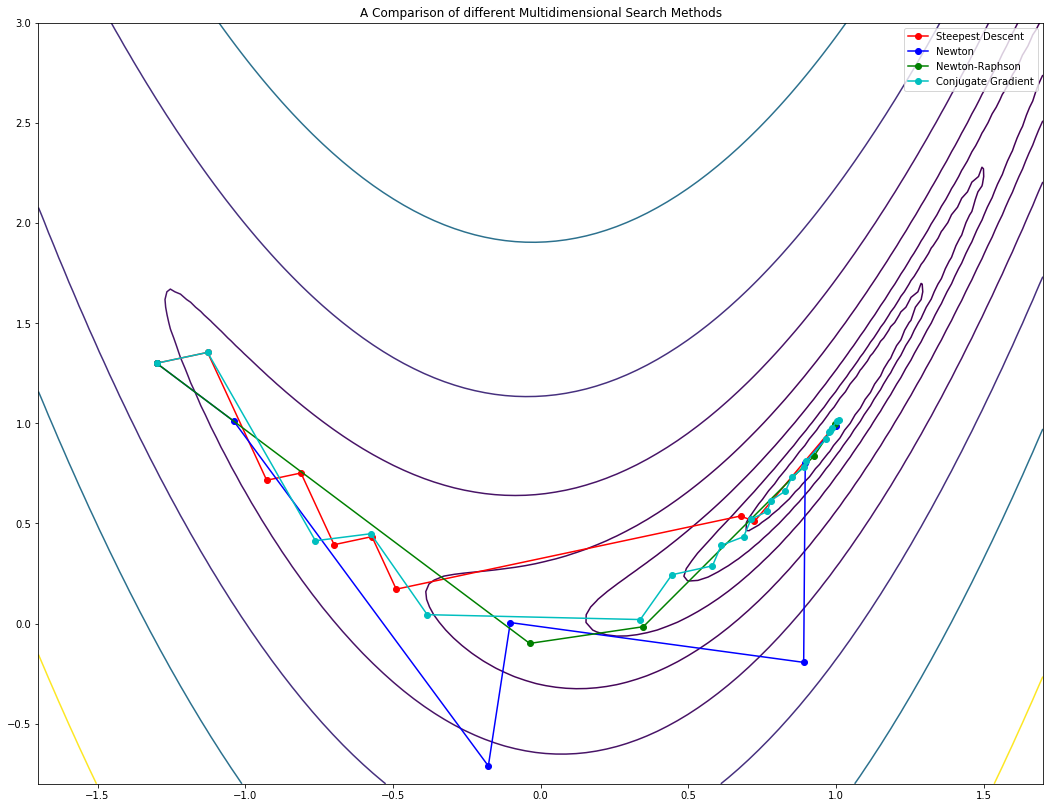

4


In [191]:
fig = figure(figsize=(18,14))

x,y = np.meshgrid(np.linspace(-1.7,1.7,100), np.linspace(-0.8,3,100))
R = [[Rosen(np.array([x[j,i],y[j,i]])) for i in range(size(x,0)) ] for j in range(size(x,1))]

contour(x, y, R, np.logspace(-1,2, 8))

#plot graphs against eachother
xmin_sd, traj_sd, itr_sd = steepest_descent(Rosen, dRosen, np.array([-1.3,1.3]), 1e-1, 1e-8)
plot([traj_sd[i][0] for i in range(len(traj_sd))], [traj_sd[i][1] for i in range(len(traj_sd))], "r-o", label='Steepest Descent')

xmin_n, traj_n, itr_n = newton(Rosen, dRosen, ddRosen, np.array([-1.3,1.3]), 1e-1, 1e-8)
plot([traj_n[i][0] for i in range(len(traj_n))], [traj_n[i][1] for i in range(len(traj_n))], "b-o", label='Newton')

xmin_nr, traj_nr, itr_nr = newton_raphson(Rosen, dRosen, ddRosen, np.array([-1.3,1.3]), 1e-1, 1e-8)
plot([traj_nr[i][0] for i in range(len(traj_nr))], [traj_nr[i][1] for i in range(len(traj_nr))], "g-o", label='Newton-Raphson')

xmin_cg, traj_cg, itr_cg = conjugate_gradients(Rosen,dRosen, np.array([-1.3,1.3]), 1e-1, 1e-8,2)
plot([traj_cg[i][0] for i in range(len(traj_cg))], [traj_cg[i][1] for i in range(len(traj_cg))], "c-o", label='Conjugate Gradient')


title("A Comparison of different Multidimensional Search Methods")
legend()
show()

In [218]:
print("Iterations vs Method:")
print("Method     ||  Steepest Descent |   Newton's   |   Newton-Raphson   |    Conj-Grad")
print("Iterations ||          {}        |      {}       |         {}          |        {}   ".format(itr_sd, itr_n, itr_nr, itr_cg))

Iterations vs Method:
Method     ||  Steepest Descent |   Newton's   |   Newton-Raphson   |    Conj-Grad
Iterations ||          9        |      6       |         4          |        22   


For rosenbrock's function, the Newton-Raphson method is the fastest optimisation method